In [8]:
#In this model - I changed the data augmentation parameters and the weights for viola (class =15) and changed the number of layers 

In [9]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

# Setting weights to the train class_weights

In [10]:
#setting class_weights based on the class 10. 
#Essentially we treating every instance of the classes as instances of class 10
# For example weight of 4 for class 0 means: 
    #treat every instance of class 0 as 4 instances of class 10

class_weight = {0:4. ,
                1:2., 
                2:1.5 ,
                3:2.,
                4:3.,
                5:2.,
                6:1.5,
                7:4.,
                8:2.,
                9:3.,
                10:1.,
                11:4.,
                12:3.,
                13:2.,
                14:3.,
                15:2.5
               }

# Loading the images into train and validation sets

Load the images

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#setting the directory for the train dataset
directory = r"../raw_data/train"

In [31]:
#augmenting the data 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        width_shift_range=0.3,
        zoom_range=[0.5, 1.5],
        rotation_range =90,
        brightness_range=(0.1, 0.9),
        channel_shift_range=150.0,
        validation_split = 0.2)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split = 0.2)

In [32]:
img_height, img_width = (256,256)

In [33]:
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123) # set as training data

validation_generator = valid_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123) # set as validation data

Found 3460 images belonging to 16 classes.
Found 857 images belonging to 16 classes.


# Training baseline model

In [34]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [35]:
num_classes = 16

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, input_shape=(img_height, img_width, 3),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [36]:
import tensorflow.keras.losses

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)       

In [38]:
epochs=10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    class_weight=class_weight,
    epochs = epochs)

Epoch 1/10
108/108 [==============================] - 124s 1s/step - loss: 5.9755 - accuracy: 0.0802 - val_loss: 2.6947 - val_accuracy: 0.1226
Epoch 2/10
108/108 [==============================] - 125s 1s/step - loss: 5.8611 - accuracy: 0.1228 - val_loss: 2.6231 - val_accuracy: 0.1502
Epoch 3/10
108/108 [==============================] - 126s 1s/step - loss: 5.6384 - accuracy: 0.1613 - val_loss: 2.5318 - val_accuracy: 0.1262
Epoch 4/10
108/108 [==============================] - 119s 1s/step - loss: 5.4924 - accuracy: 0.1771 - val_loss: 2.4297 - val_accuracy: 0.2019
Epoch 5/10
108/108 [==============================] - 125s 1s/step - loss: 5.4468 - accuracy: 0.1663 - val_loss: 2.5172 - val_accuracy: 0.1863
Epoch 6/10
108/108 [==============================] - 122s 1s/step - loss: 5.3609 - accuracy: 0.1765 - val_loss: 2.4269 - val_accuracy: 0.1995
Epoch 7/10
108/108 [==============================] - 132s 1s/step - loss: 5.3029 - accuracy: 0.1899 - val_loss: 2.5092 - val_accuracy: 0.1923

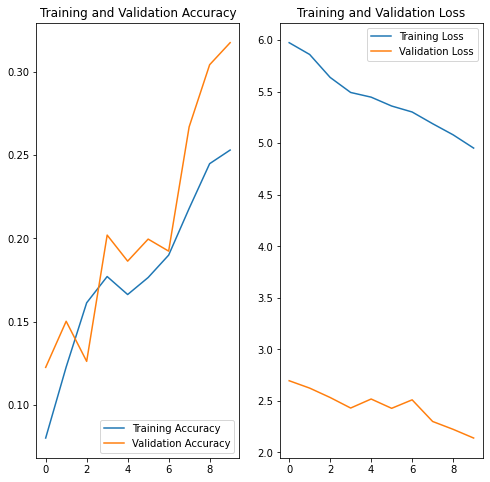

In [60]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
model.save(r'../model/cnn_3_rm')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../model/cnn_3_rm/assets


# Checking succession rate

#### Loading test csv

In [41]:
import pandas as pd
test_df = pd.read_csv("../plantbase/data/test_data.csv").drop(columns = "Unnamed: 0")

In [42]:
test_df = test_df[['id', 'genus']]
test_df.head()

,id,genus
0,100035,Verbascum
1,100058,Trifolium
2,100186,Veronica
3,100238,Campanula
4,1003,Geranium


In [43]:
import numpy as np
columns = np.sort(test_df.genus.unique())
columns

array(['Ajuga', 'Allium', 'Campanula', 'Cirsium', 'Crataegus', 'Gentiana',
       'Geranium', 'Iris', 'Malva', 'Narcissus', 'Ophrys', 'Rosa',
       'Trifolium', 'Verbascum', 'Veronica', 'Viola'], dtype=object)

In [44]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1
    
rename_columns

{0: 'Ajuga',
 1: 'Allium',
 2: 'Campanula',
 3: 'Cirsium',
 4: 'Crataegus',
 5: 'Gentiana',
 6: 'Geranium',
 7: 'Iris',
 8: 'Malva',
 9: 'Narcissus',
 10: 'Ophrys',
 11: 'Rosa',
 12: 'Trifolium',
 13: 'Verbascum',
 14: 'Veronica',
 15: 'Viola'}

#### Loading test images using tensorflow load_img and img_to_array

In [45]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [46]:
X_list = []
y_list = []

for index, row in test_df.iterrows():
    img = load_img(rf"../raw_data/test/{row.id}.jpg", target_size=(256, 256))
    img = tensorflow.keras.preprocessing.image.img_to_array(img)
    #img = tensorflow.expand_dims(img, 0)
    X_list.append(img)
    y_list.append((row.genus, row.id))

In [47]:
y_true_df = pd.DataFrame(y_list, columns = ['true_genus', 'id'])
y_true_df.head()

,true_genus,id
0,Verbascum,100035
1,Trifolium,100058
2,Veronica,100186
3,Campanula,100238
4,Geranium,1003


In [48]:
X_test = np.stack(X_list, axis=0)

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred.shape

(1341, 16)

In [51]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns = rename_columns)
y_pred_df.head()

,Ajuga,Allium,Campanula,Cirsium,Crataegus,Gentiana,Geranium,Iris,Malva,Narcissus,Ophrys,Rosa,Trifolium,Verbascum,Veronica,Viola
0,-2023.114014,-3365.900391,-3581.814209,-3413.631836,-1887.825806,837.167969,-3096.028076,1508.556274,-3210.463135,1785.828857,182.369110,-436.427643,-1124.246460,1950.775513,-2645.314209,880.541382
1,231.936966,-121.793205,523.629700,-1547.799438,-1721.629028,717.939270,-30.378267,662.704834,-803.771057,273.809509,-102.642227,180.057938,25.318199,312.621918,907.816650,-443.965912
2,148.572906,-199.254318,137.476120,-56.768887,-192.207260,314.121460,-39.803009,75.353821,-145.019943,-468.576691,-138.687347,-90.473640,-75.508430,-206.672806,352.136353,137.983780
3,70.511551,-186.270599,188.742630,98.057854,-610.466736,346.850464,254.675110,95.750137,35.316063,-940.732178,-120.292870,-21.796915,-34.500523,-565.822998,308.680573,343.646484
4,204.535263,-162.313614,402.907410,-15.550681,-754.892029,516.192871,164.819565,251.636917,-42.125202,-1086.558838,-300.745911,-132.305237,-92.566292,-830.688660,470.097595,493.093140


In [52]:
y_true = np.stack(y_list, axis = 0)

In [53]:
y_pred_df['pred_genus'] = y_pred_df.idxmax(axis = 1)
y_pred_df['pred_genus']

0       Verbascum
1        Veronica
2        Veronica
3        Gentiana
4        Gentiana
5        Veronica
6       Verbascum
7       Narcissus
8        Geranium
9        Veronica
10       Veronica
11          Malva
12          Viola
13      Campanula
14       Gentiana
15       Veronica
16       Veronica
17      Trifolium
18         Ophrys
19      Campanula
20          Malva
21       Veronica
22       Gentiana
23      Campanula
24       Veronica
25         Ophrys
26      Verbascum
27       Geranium
28          Viola
29       Veronica
          ...    
1311     Geranium
1312        Malva
1313     Veronica
1314        Viola
1315    Trifolium
1316      Cirsium
1317    Campanula
1318     Gentiana
1319     Geranium
1320     Veronica
1321    Campanula
1322        Viola
1323     Veronica
1324     Veronica
1325        Malva
1326     Veronica
1327      Cirsium
1328         Rosa
1329     Gentiana
1330     Veronica
1331         Iris
1332    Verbascum
1333     Veronica
1334     Gentiana
1335    Tr

In [54]:
prediction_review = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [55]:
prediction_vec_df = y_pred_df[['pred_genus']].copy()
prediction_vec_df['true_genus'] = y_true_df['true_genus'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [56]:
prediction_vec_df['false'] = prediction_vec_df['result'].apply(lambda x: 1 if x == False else 0)
prediction_vec_df['true'] = prediction_vec_df['result'].apply(lambda x: 1 if x == True else 0)
prediction_vec_df.head(2)

,pred_genus,true_genus,result,false,true
0,Verbascum,Verbascum,True,0,1
1,Veronica,Trifolium,False,1,0


In [57]:
true_pos_neg = prediction_vec_df.groupby('true_genus').sum().drop(columns=['result'])
true_pos_neg['percent_true'] = true_pos_neg['true'] / (true_pos_neg['true'] + true_pos_neg['false'])

In [58]:
success_ratio = round(true_pos_neg[['percent_true']]*100).sort_values(by='percent_true', ascending=False)

In [59]:
success_ratio

,percent_true
true_genus,
Verbascum,79.0
Veronica,78.0
Narcissus,68.0
Malva,50.0
Rosa,28.0
Trifolium,24.0
Gentiana,23.0
Geranium,22.0
Campanula,18.0
